In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle as pkl
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import matplotlib

# REINFORCE

In [16]:
!python3 multiple_cartpoles.py --num_runs 30 --train_episodes 50_000 --mode 'naive' --path 'reinforce_50k/reinforce_naive_30_runs'

In [17]:
!python3 multiple_cartpoles.py --num_runs 30 --train_episodes 50_000 --mode 'standard' --path 'reinforce_50k/reinforce_standard_30_runs'

In [18]:
!python3 multiple_cartpoles.py --num_runs 30 --train_episodes 50_000 --mode 20 --path 'reinforce_50k/reinforce_baseline20_30_runs'

In [19]:
data_naive = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])
for file in os.listdir('reinforce_50k/reinforce_naive_30_runs'):
    with open(f'reinforce_50k/reinforce_naive_30_runs/{file}', 'rb') as f:
        data_tmp = pkl.load(f)
    data_naive = pd.concat([data_naive, data_tmp], ignore_index=True)

data_baseline20 = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])
for file in os.listdir('reinforce_50k/reinforce_baseline20_30_runs'):
    with open(f'reinforce_50k/reinforce_baseline20_30_runs/{file}', 'rb') as f:
        data_tmp = pkl.load(f)
    data_baseline20 = pd.concat([data_baseline20, data_tmp], ignore_index=True)

data_baseline40 = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])
for file in os.listdir('reinforce_50k/reinforce_baseline40_10_runs'):
    with open(f'reinforce_50k/reinforce_baseline40_10_runs/{file}', 'rb') as f:
        data_tmp = pkl.load(f)
    data_baseline40 = pd.concat([data_baseline40, data_tmp], ignore_index=True)

data_baseline50 = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])
for file in os.listdir('reinforce_50k/reinforce_baseline50_30_runs'):
    with open(f'reinforce_50k/reinforce_baseline50_30_runs/{file}', 'rb') as f:
        data_tmp = pkl.load(f)
    data_baseline50 = pd.concat([data_baseline50, data_tmp], ignore_index=True)

data_baseline60 = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])
for file in os.listdir('reinforce_50k/reinforce_baseline60_10_runs'):
    with open(f'reinforce_50k/reinforce_baseline60_10_runs/{file}', 'rb') as f:
        data_tmp = pkl.load(f)
    data_baseline60 = pd.concat([data_baseline60, data_tmp], ignore_index=True)

data_baseline80 = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])
for file in os.listdir('reinforce_50k/reinforce_baseline80_30_runs'):
    with open(f'reinforce_50k/reinforce_baseline80_30_runs/{file}', 'rb') as f:
        data_tmp = pkl.load(f)
    data_baseline80 = pd.concat([data_baseline80, data_tmp], ignore_index=True)

data_standard = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])
for file in os.listdir('reinforce_50k/reinforce_standard_30_runs'):
    with open(f'reinforce_50k/reinforce_standard_30_runs/{file}', 'rb') as f:
        data_tmp = pkl.load(f)
    data_standard = pd.concat([data_standard, data_tmp], ignore_index=True)

In [20]:
window_size = 500
episodes_naive = data_naive['episode'].unique()
mean_rewards_naive = []
reward_variances_naive = []

average_naive = data_naive.groupby('episode').mean(numeric_only=True)
std_naive = data_naive.groupby('episode').std(numeric_only=True)
moving_avg_rew_naive = [np.mean(average_naive['reward'][i:i+window_size]) for i in range(len(data_naive[:50_000]) - window_size + 1)]
moving_var_rew_naive = [np.std(average_naive['reward'][i:i+window_size]) for i in range(len(data_naive[:50_000]) - window_size + 1)]


episodes_baseline20 = data_baseline20['episode'].unique()
mean_rewards_baseline20 = []
reward_variances_baseline20 = []

average_baseline20 = data_baseline20.groupby('episode').mean(numeric_only=True)
std_baseline20 = data_baseline20.groupby('episode').std(numeric_only=True)
moving_avg_rew_baseline20 = [np.mean(average_baseline20['reward'][i:i+window_size]) for i in range(len(data_baseline20[:50_000]) - window_size + 1)]
moving_var_rew_baseline20 = [np.std(average_baseline20['reward'][i:i+window_size]) for i in range(len(data_baseline20[:50_000]) - window_size + 1)]


episodes_baseline40 = data_baseline40['episode'].unique()
mean_rewards_baseline40 = []
reward_variances_baseline40 = []

average_baseline40 = data_baseline40.groupby('episode').mean(numeric_only=True)
std_baseline40 = data_baseline40.groupby('episode').std(numeric_only=True)
moving_avg_rew_baseline40 = [np.mean(average_baseline40['reward'][i:i+window_size]) for i in range(len(data_baseline40[:50_000]) - window_size + 1)]
moving_var_rew_baseline40 = [np.std(average_baseline40['reward'][i:i+window_size]) for i in range(len(data_baseline40[:50_000]) - window_size + 1)]


episodes_baseline50 = data_baseline50['episode'].unique()
mean_rewards_baseline50 = []
reward_variances_baseline50 = []

average_baseline50 = data_baseline50.groupby('episode').mean(numeric_only=True)
std_baseline50 = data_baseline50.groupby('episode').std(numeric_only=True)
moving_avg_rew_baseline50 = [np.mean(average_baseline50['reward'][i:i+window_size]) for i in range(len(data_baseline50[:50_000]) - window_size + 1)]
moving_var_rew_baseline50 = [np.std(average_baseline50['reward'][i:i+window_size]) for i in range(len(data_baseline50[:50_000]) - window_size + 1)]


episodes_baseline60 = data_baseline60['episode'].unique()
mean_rewards_baseline60 = []
reward_variances_baseline60 = []

average_baseline60 = data_baseline60.groupby('episode').mean(numeric_only=True)
std_baseline60 = data_baseline60.groupby('episode').std(numeric_only=True)
moving_avg_rew_baseline60 = [np.mean(average_baseline60['reward'][i:i+window_size]) for i in range(len(data_baseline60[:50_000]) - window_size + 1)]
moving_var_rew_baseline60 = [np.std(average_baseline60['reward'][i:i+window_size]) for i in range(len(data_baseline60[:50_000]) - window_size + 1)]


episodes_baseline80 = data_baseline80['episode'].unique()
mean_rewards_baseline80 = []
reward_variances_baseline80 = []

average_baseline80 = data_baseline80.groupby('episode').mean(numeric_only=True)
std_baseline80 = data_baseline80.groupby('episode').std(numeric_only=True)
moving_avg_rew_baseline80 = [np.mean(average_baseline80['reward'][i:i+window_size]) for i in range(len(data_baseline80[:50_000]) - window_size + 1)]
moving_var_rew_baseline80 = [np.std(average_baseline80['reward'][i:i+window_size]) for i in range(len(data_baseline80[:50_000]) - window_size + 1)]


episodes_standard = data_standard['episode'].unique()
mean_rewards_standard = []
reward_variances_standard = []

average_standard = data_standard.groupby('episode').mean(numeric_only=True)
std_standard = data_standard.groupby('episode').std(numeric_only=True)
moving_avg_rew_standard = [np.mean(average_standard['reward'][i:i+window_size]) for i in range(len(data_standard[:50_000]) - window_size + 1)]
moving_var_rew_standard = [np.std(average_standard['reward'][i:i+window_size]) for i in range(len(data_standard[:50_000]) - window_size + 1)]

In [9]:
cmap1 = plt.get_cmap('cool')(75)
cmap2 = plt.get_cmap('cool')(125)
cmap3 = plt.get_cmap('cool')(200)
cmap4 = plt.get_cmap('Wistia')(200)

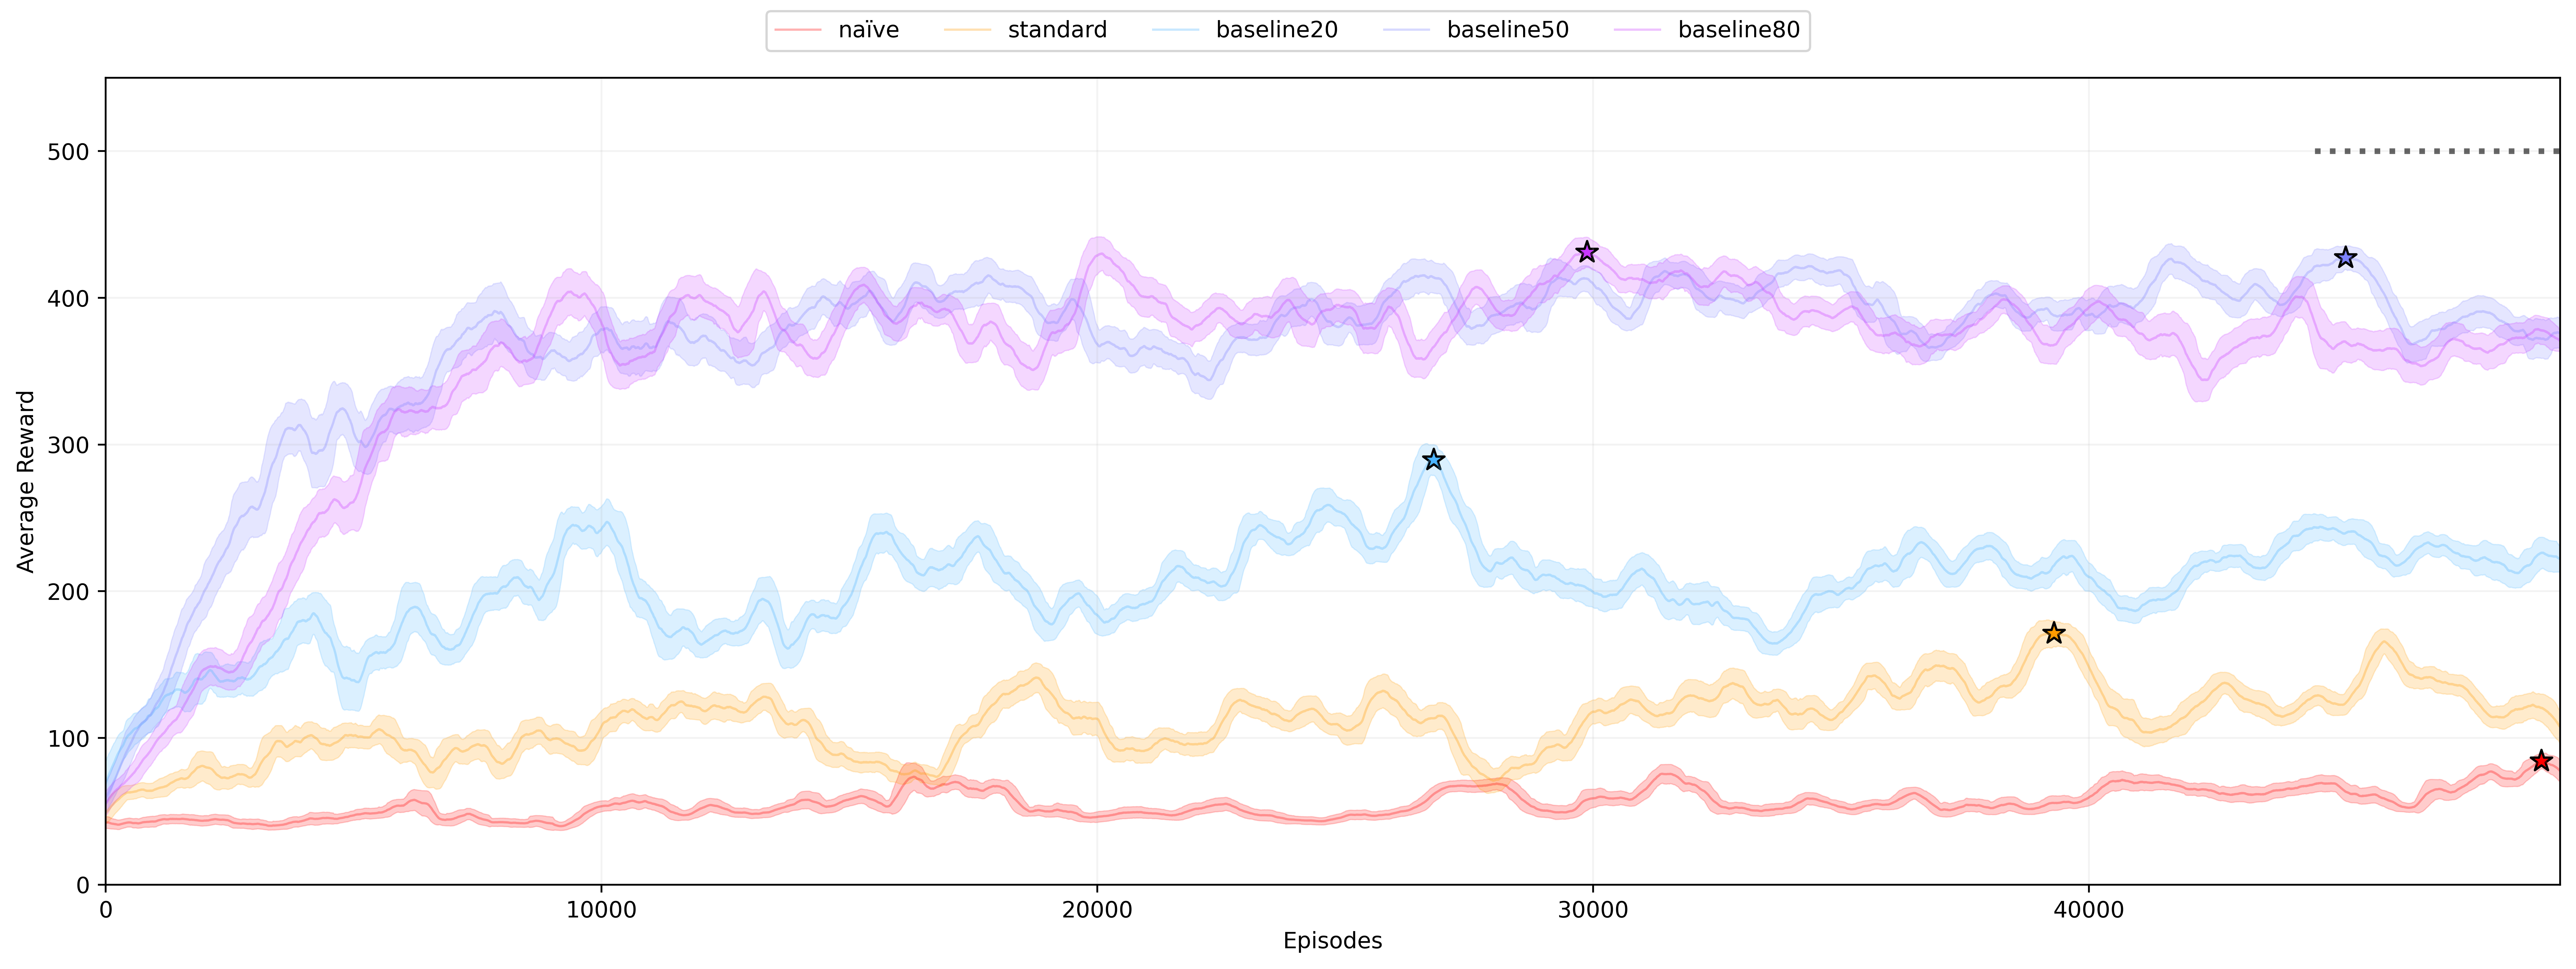

In [10]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=500)

ax.plot(moving_avg_rew_naive, label='naïve', color = 'red', alpha=0.3, linewidth=1)
ax.fill_between(range(len(moving_avg_rew_naive)), np.array(moving_avg_rew_naive) - np.array(moving_var_rew_naive), 
                np.array(moving_avg_rew_naive) + np.array(moving_var_rew_naive), alpha=0.2, color = 'red', linewidth = 0.5)
ax.scatter(np.argmax(moving_avg_rew_naive), np.max(moving_avg_rew_naive), color = 'red', s = 100, marker='*', edgecolors='black')

ax.plot(moving_avg_rew_standard, label='standard', color = cmap4, alpha=0.3, linewidth=1)
ax.fill_between(range(len(moving_avg_rew_standard)), np.array(moving_avg_rew_standard) - np.array(moving_var_rew_standard),
                np.array(moving_avg_rew_standard) + np.array(moving_var_rew_standard), alpha=0.2, color = cmap4, linewidth = 0.5)
ax.scatter(np.argmax(moving_avg_rew_standard), np.max(moving_avg_rew_standard), color = cmap4, s = 100, marker='*', edgecolors='black')

ax.plot(moving_avg_rew_baseline20, label='baseline20', color = cmap1, alpha=0.3, linewidth=1)
ax.fill_between(range(len(moving_avg_rew_baseline20)), np.array(moving_avg_rew_baseline20) - np.array(moving_var_rew_baseline20), 
                np.array(moving_avg_rew_baseline20) + np.array(moving_var_rew_baseline20), alpha=0.2, color = cmap1, linewidth = 0.5)
ax.scatter(np.argmax(moving_avg_rew_baseline20), np.max(moving_avg_rew_baseline20), color = cmap1, s = 100, marker='*', edgecolors='black')

ax.plot(moving_avg_rew_baseline50, label='baseline50', color = cmap2, alpha=0.3, linewidth=1)
ax.fill_between(range(len(moving_avg_rew_baseline50)), np.array(moving_avg_rew_baseline50) - np.array(moving_var_rew_baseline50),
                np.array(moving_avg_rew_baseline50) + np.array(moving_var_rew_baseline50), alpha=0.2, color = cmap2, linewidth = 0.5)
ax.scatter(np.argmax(moving_avg_rew_baseline50), np.max(moving_avg_rew_baseline50), color = cmap2, s = 100, marker='*', edgecolors='black')

ax.plot(moving_avg_rew_baseline80, label='baseline80', color = cmap3, alpha=0.3, linewidth=1)
ax.fill_between(range(len(moving_avg_rew_baseline80)), np.array(moving_avg_rew_baseline80) - np.array(moving_var_rew_baseline80),
                np.array(moving_avg_rew_baseline80) + np.array(moving_var_rew_baseline80), alpha=0.2, color = cmap3, linewidth = 0.5)
ax.scatter(np.argmax(moving_avg_rew_baseline80), np.max(moving_avg_rew_baseline80), color = cmap3, s = 100, marker='*', edgecolors='black')

ax.set_ylim(0, 550)
ax.axhline(500, xmin = 0.9, xmax = 1, color='black', linestyle='dotted', alpha = 0.6, linewidth = 2.5)

ax.grid(alpha = 0.15)
ax.set_xlim(0, len(moving_avg_rew_naive))
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Reward')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols = 5)
fig.tight_layout(rect=(0,0,1,0.95))

# PPO

In [21]:
!python3 cartpole_sb3.py --total_timesteps 500_000 --algo ppo --test_episodes 100 --lr 0.0003

# SAC

In [22]:
!python3 cartpole_sb3.py --total_timesteps 200_000 --algo sac --test_episodes 100 --lr 0.0003 --gradient_steps 1 --gamma 0.995 --train_freq 1 --target_update_interval 1 --batch_size 512

# Comparison

In [ ]:
data_ppo = pd.DataFrame(columns=['r', 'l', 't', 'run'])
data_sac = pd.DataFrame(columns=['r', 'l', 't', 'run'])
data_baseline = pd.DataFrame(columns=['episode', 'train_run_id', 'algorithm', 'reward'])

for i, file in enumerate(os.listdir('ppo_500k_30_runs')):
    with open(f'ppo_500k_30_runs/{file}', 'rb') as f:
        data_tmp = pd.read_csv(f, skiprows=1).iloc[:1400, :]
        data_tmp['run'] = i
        data_ppo = pd.concat([data_ppo, data_tmp], ignore_index=True)

for i, file in enumerate(os.listdir('sac_200k_30_runs')):
    with open(f'sac_200k_30_runs/{file}', 'rb') as f:
        data_tmp = pd.read_csv(f, skiprows=1).iloc[:500, :]
        data_tmp['run'] = i
        data_sac = pd.concat([data_sac, data_tmp], ignore_index=True)

data_ppo['episode'] = np.array(data_ppo.index) % 1400
data_sac['episode'] = np.array(data_sac.index) % 500

In [24]:
window_size = 20

episodes_ppo = data_ppo['episode'].unique()
mean_rewards_ppo = []
reward_variances_ppo = []

average_ppo = data_ppo.groupby('episode').mean(numeric_only=True)
std_ppo = data_ppo.groupby('episode').std(numeric_only=True)
moving_avg_rew_ppo = [np.mean(average_ppo['r'][i:i+window_size]) for i in range(len(data_ppo) - window_size + 1)]
moving_var_rew_ppo = [np.std(average_ppo['r'][i:i+window_size]) for i in range(len(data_ppo) - window_size + 1)]
moving_avg_t_ppo = [np.mean(average_ppo['t'][i:i+window_size]) for i in range(len(data_ppo) - window_size + 1)]
moving_var_t_ppo = [np.std(average_ppo['t'][i:i+window_size]) for i in range(len(data_ppo) - window_size + 1)]
moving_avg_t_diff_ppo = [np.mean(average_ppo['t'].diff()[i:i+window_size]) for i in range(len(data_ppo) - window_size + 1)]
moving_var_t_diff_ppo = [np.std(average_ppo['t'].diff()[i:i+window_size]) for i in range(len(data_ppo) - window_size + 1)]

episodes_sac = data_sac['episode'].unique()
mean_rewards_sac = []
reward_variances_sac = []

average_sac = data_sac.groupby('episode').mean(numeric_only=True)
std_sac = data_sac.groupby('episode').std(numeric_only=True)
moving_avg_rew_sac = [np.mean(average_sac['r'][i:i+window_size]) for i in range(len(data_sac) - window_size + 1)]
moving_var_rew_sac = [np.std(average_sac['r'][i:i+window_size]) for i in range(len(data_sac) - window_size + 1)]
moving_avg_t_sac = [np.mean(average_sac['t'][i:i+window_size]) for i in range(len(data_sac) - window_size + 1)]
moving_var_t_sac = [np.std(average_sac['t'][i:i+window_size]) for i in range(len(data_sac) - window_size + 1)]
moving_avg_t_diff_sac = [np.mean(average_sac['t'].diff()[i:i+window_size]) for i in range(len(data_sac) - window_size + 1)]
moving_var_t_diff_sac = [np.std(average_sac['t'].diff()[i:i+window_size]) for i in range(len(data_sac) - window_size + 1)]

In [14]:
cmap5 = plt.get_cmap('winter')(250)
cmap6 = plt.get_cmap('winter')(180)

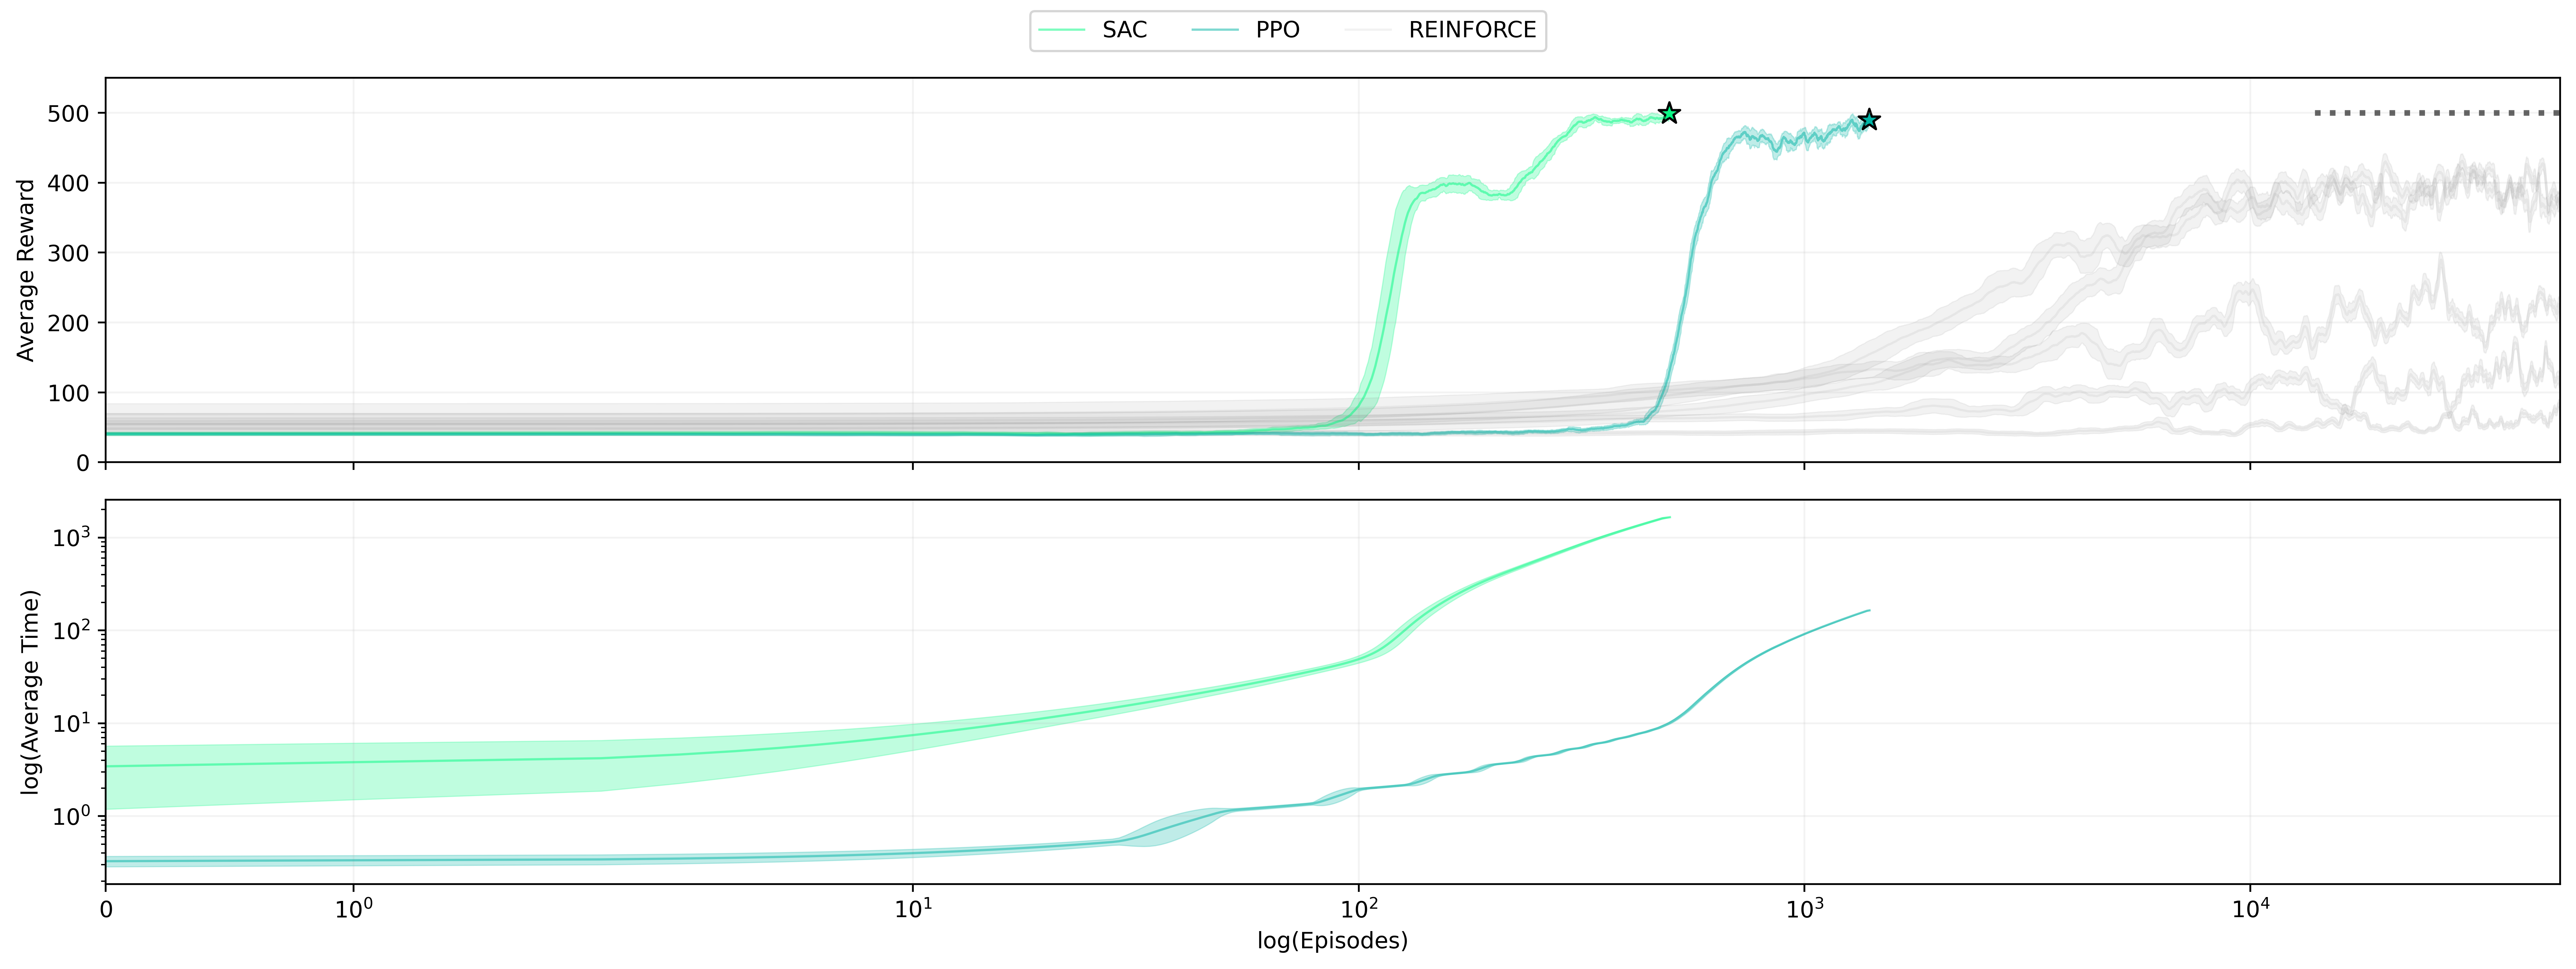

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(16, 6), dpi=500)

ax[0].plot(moving_avg_rew_sac, label='SAC', color = cmap5, alpha=0.5, linewidth=1)
ax[0].fill_between(range(len(moving_avg_rew_sac)), np.array(moving_avg_rew_sac) - np.array(moving_var_rew_sac),
                np.array(moving_avg_rew_sac) + np.array(moving_var_rew_sac), alpha=0.25, color = cmap5, linewidth = 0.5)

ax[0].plot(moving_avg_rew_ppo, label='PPO', color = cmap6, alpha=0.5, linewidth=1)
ax[0].fill_between(range(len(moving_avg_rew_ppo)), np.array(moving_avg_rew_ppo) - np.array(moving_var_rew_ppo),
                np.array(moving_avg_rew_ppo) + np.array(moving_var_rew_ppo), alpha=0.25, color = cmap6, linewidth = 0.5)

ax[0].plot(moving_avg_rew_baseline80, label = 'REINFORCE', color = 'grey', alpha=0.1, linewidth=1)
ax[0].fill_between(range(len(moving_avg_rew_baseline80)), np.array(moving_avg_rew_baseline80) - np.array(moving_var_rew_baseline80),
                np.array(moving_avg_rew_baseline80) + np.array(moving_var_rew_baseline80), alpha=0.1, color = 'grey', linewidth = 0.5)

ax[0].plot(moving_avg_rew_baseline50, color = 'grey', alpha=0.1, linewidth=1)
ax[0].fill_between(range(len(moving_avg_rew_baseline50)), np.array(moving_avg_rew_baseline50) - np.array(moving_var_rew_baseline50),
                np.array(moving_avg_rew_baseline50) + np.array(moving_var_rew_baseline50), alpha=0.1, color = 'grey', linewidth = 0.5)

ax[0].plot(moving_avg_rew_baseline20, color = 'grey', alpha=0.1, linewidth=1)
ax[0].fill_between(range(len(moving_avg_rew_baseline20)), np.array(moving_avg_rew_baseline20) - np.array(moving_var_rew_baseline20), 
                np.array(moving_avg_rew_baseline20) + np.array(moving_var_rew_baseline20), alpha=0.1, color = 'grey', linewidth = 0.5)

ax[0].plot(moving_avg_rew_standard, color = 'grey', alpha=0.1, linewidth=1)
ax[0].fill_between(range(len(moving_avg_rew_standard)), np.array(moving_avg_rew_standard) - np.array(moving_var_rew_standard),
                np.array(moving_avg_rew_standard) + np.array(moving_var_rew_standard), alpha=0.1, color = 'grey', linewidth = 0.5)

ax[0].plot(moving_avg_rew_naive, color = 'grey', alpha=0.1, linewidth=1)
ax[0].fill_between(range(len(moving_avg_rew_naive)), np.array(moving_avg_rew_naive) - np.array(moving_var_rew_naive), 
                np.array(moving_avg_rew_naive) + np.array(moving_var_rew_naive), alpha=0.1, color = 'grey', linewidth = 0.5)

ax[1].plot(moving_avg_t_sac, label='SAC', color = cmap5, alpha=0.5, linewidth=1)
ax[1].fill_between(range(len(moving_avg_t_sac)), np.array(moving_avg_t_sac) - np.array(moving_var_t_sac),
                np.array(moving_avg_t_sac) + np.array(moving_var_t_sac), alpha=0.25, color = cmap5, linewidth = 0.5)

ax[1].plot(moving_avg_t_ppo, label='SAC', color = cmap6, alpha=0.5, linewidth=1)
ax[1].fill_between(range(len(moving_avg_t_ppo)), np.array(moving_avg_t_ppo) - np.array(moving_var_t_ppo),
                np.array(moving_avg_t_ppo) + np.array(moving_var_t_ppo), alpha=0.25, color = cmap6, linewidth = 0.5)

ax[0].scatter(np.nanargmax(moving_avg_rew_sac), np.nanmax(moving_avg_rew_sac), color = cmap5, s = 100, marker='*', edgecolors='black')
ax[0].scatter(np.nanargmax(moving_avg_rew_ppo), np.nanmax(moving_avg_rew_ppo), color = cmap6, s = 100, marker='*', edgecolors='black')

ax[0].set_ylim(0, 550)
ax[0].axhline(500, xmin = 0.9, xmax = 1, color='black', linestyle='dotted', alpha = 0.6, linewidth = 2.5)

ax[0].grid(alpha = 0.15)
ax[1].grid(alpha = 0.15)
ax[0].set_xlim(0, len(moving_avg_rew_naive))
ax[1].set_xlim(0, len(moving_avg_rew_naive))


ax[1].set_xlabel('log(Episodes)')
ax[0].set_ylabel('Average Reward')
ax[1].set_ylabel('log(Average Time)')
ax[0].set_xscale('symlog')
ax[1].set_xscale('symlog')
ax[1].set_yscale('log')
ax[0].set_xticklabels([])
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols = 3)
fig.tight_layout(rect=(0,0,1,0.95))

In [25]:
maximum_values = np.array([[np.nanargmax(moving_avg_rew_naive), np.nanmax(moving_avg_rew_naive)], 
                           [np.nanargmax(moving_avg_rew_standard), np.nanmax(moving_avg_rew_standard)], 
                           [np.nanargmax(moving_avg_rew_baseline20), np.nanmax(moving_avg_rew_baseline20)], 
                           [np.nanargmax(moving_avg_rew_baseline50), np.nanmax(moving_avg_rew_baseline50)], 
                           [np.nanargmax(moving_avg_rew_baseline80), np.nanmax(moving_avg_rew_baseline80)], 
                           [np.nanargmax(moving_avg_rew_ppo), np.nanmax(moving_avg_rew_ppo)], 
                           [np.nanargmax(moving_avg_rew_sac), np.nanmax(moving_avg_rew_sac)]])

modelGMM = GaussianMixture(n_components=2, covariance_type="full").fit(maximum_values)


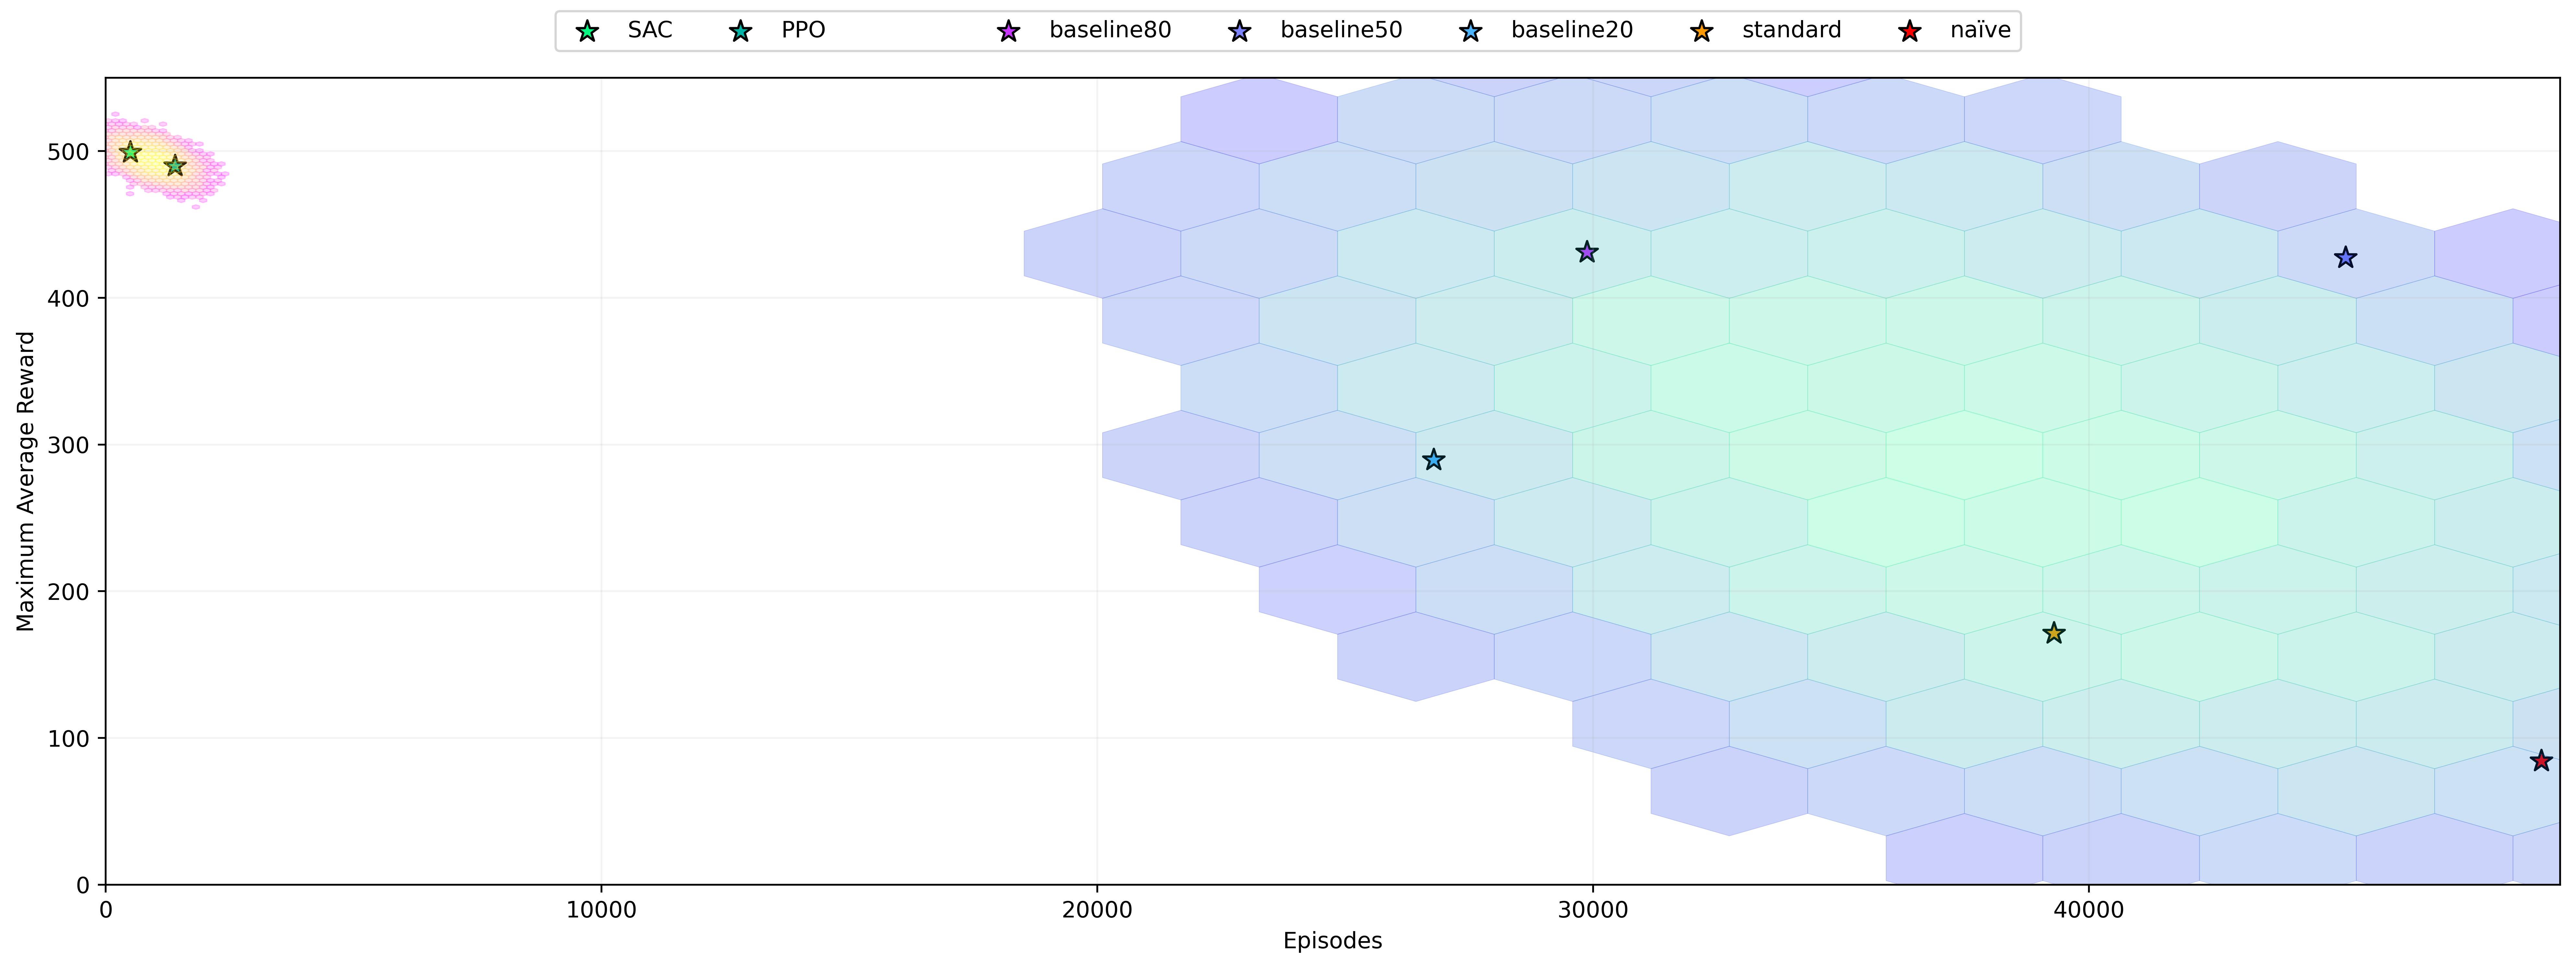

In [32]:

fig, ax = plt.subplots(1, 1, figsize=(16, 6), dpi=500)

ax.scatter(np.nanargmax(moving_avg_rew_sac), np.nanmax(moving_avg_rew_sac), color = cmap5, s = 100, marker='*', edgecolors='black', label='SAC')
ax.scatter(np.nanargmax(moving_avg_rew_ppo), np.nanmax(moving_avg_rew_ppo), color = cmap6, s = 100, marker='*', edgecolors='black', label='PPO')
line_dummy, = ax.plot([], [], ' ', label=' ')
ax.scatter(np.nanargmax(moving_avg_rew_baseline80), np.nanmax(moving_avg_rew_baseline80), color = cmap3, s = 100, marker='*', edgecolors='black', label='baseline80')
ax.scatter(np.nanargmax(moving_avg_rew_baseline50), np.nanmax(moving_avg_rew_baseline50), color = cmap2 , s = 100, marker='*', edgecolors='black', label='baseline50')
ax.scatter(np.nanargmax(moving_avg_rew_baseline20), np.nanmax(moving_avg_rew_baseline20), color = cmap1, s = 100, marker='*', edgecolors='black', label='baseline20')
ax.scatter(np.nanargmax(moving_avg_rew_standard), np.nanmax(moving_avg_rew_standard), color = cmap4, s = 100, marker='*', edgecolors='black', label='standard')
ax.scatter(np.nanargmax(moving_avg_rew_naive), np.nanmax(moving_avg_rew_naive), color = 'red', s = 100, marker='*', edgecolors='black', label = 'naïve')


mean = [0, 0]
cov = [[60, 50], [50, 60]] 
noise = np.random.multivariate_normal(mean, cov, 10_000)


x = np.random.multivariate_normal(modelGMM.means_[0], modelGMM.covariances_[0], 10_000) + noise
v = modelGMM.score_samples(x)
plt.hexbin(x[:, 0], x[:, 1], cmap='spring', alpha=0.2, gridsize=25, linewidths=0.5, bins='log', mincnt=2)

x = np.random.multivariate_normal(modelGMM.means_[1], modelGMM.covariances_[1], 10_000)
v = modelGMM.score_samples(x)
plt.hexbin(x[:, 0], x[:, 1], cmap='winter', alpha=0.2, gridsize=20, linewidths=0.25, bins='log', mincnt=20)

ax.set_ylim(0, 550)
ax.set_xlim(0, len(moving_avg_rew_naive))

ax.grid(alpha = 0.15)
ax.set_xlabel('Episodes')
ax.set_ylabel('Maximum Average Reward')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols = 8)
fig.tight_layout(rect=(0,0,1,0.95))